In [62]:
import pandas as pd

In [63]:
df = pd.read_csv("/home/prasun/GitDemo/Stat_ML-Learning/Exercise13/data.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

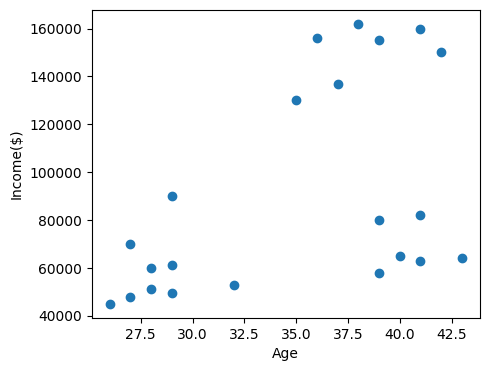

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize= (5,4))
plt.scatter(df["Age"],df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [65]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3)
y_pred = km.fit_predict(df.loc[:,["Age","Income($)"]])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [66]:
dff = df.loc[:,:]
dff["Cluster"] = y_pred
d0 = dff.loc[dff["Cluster"]==0]
d1 = dff.loc[dff["Cluster"]==1]
d2 = dff.loc[dff["Cluster"]==2]

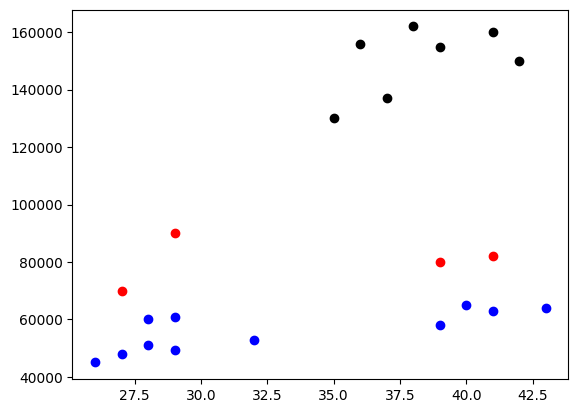

In [67]:
plt.scatter(d0["Age"],d0["Income($)"], color = "blue")
plt.scatter(d1["Age"],d1["Income($)"], color = "black")
plt.scatter(d2["Age"],d2["Income($)"], color = "red")

In [68]:
# Feature Scaling Required
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
df["Income($)"]= mn.fit_transform(df[["Income($)"]])
df["Age"] = mn.fit_transform(df[["Age"]])
df.head()

# mn.fit(df[["Income($)"]])
# df["Income($)"] = mn.transform(df[["Income($)"]])


,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [69]:
y_pred_new = km.fit_predict(df[["Age","Income($)"]])
df["Cluster"] = y_pred_new

In [79]:
# Cluster Centroids
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [70]:
dd0 = df.loc[df["Cluster"]==0]
dd1 = df.loc[df["Cluster"]==1]
dd2 = df.loc[df["Cluster"]==2]

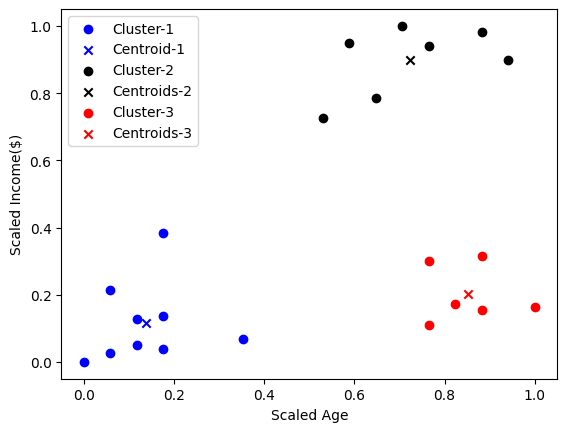

In [89]:
plt.scatter(dd0["Age"],dd0["Income($)"], color = "blue")
plt.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],color = "blue", marker= "x")
plt.scatter(dd1["Age"],dd1["Income($)"], color = "black")
plt.scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],color = "black", marker= "x")
plt.scatter(dd2["Age"],dd2["Income($)"], color = "red")
plt.scatter(km.cluster_centers_[2,0],km.cluster_centers_[2,1],color = "red", marker= "x")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income($)")
# plt.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1], marker= "*")
plt.legend(["Cluster-1","Centroid-1","Cluster-2","Centroids-2","Cluster-3","Centroids-3"])

Text(0, 0.5, 'Sum of Square Errors')

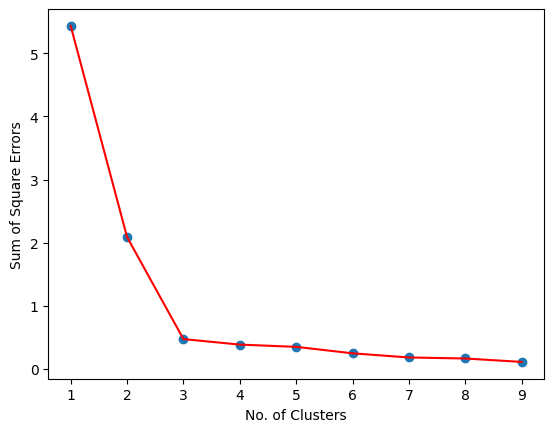

In [100]:
# Elbow Plot
sse =[]
for i in range(1,10):
    km = KMeans(n_clusters= i)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

plt.scatter(range(1,10),sse)
plt.plot(range(1,10),sse, color ="red")
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Square Errors")